<a href="https://colab.research.google.com/github/SMSajadi99/Nerual-Network/blob/main/HW04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from IPython.display import display


In [ ]:
# Open an image file
image_path = "/content/Zebra.jpg"
img = Image.open(image_path)

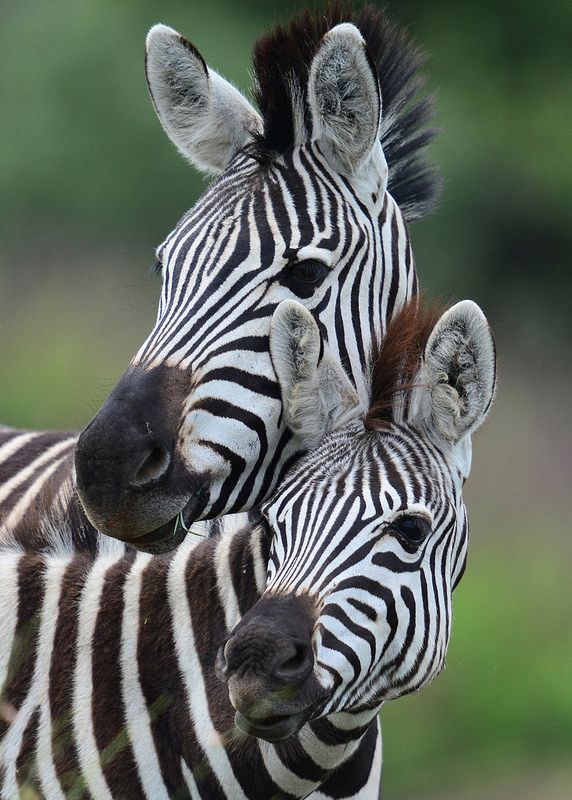

In [ ]:
# Display the image
display(img)


# 1. Lossless Compression (Huffman Coding):

In [ ]:
import heapq
from collections import defaultdict

def huffman_coding(data):
    frequency = defaultdict(int)
    for symbol in data:
        frequency[symbol] += 1

    heap = [[weight, [symbol, ""]] for symbol, weight in frequency.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

    huffman_codes = dict(heap[0][1:])
    return huffman_codes

# Open an image file
image_path = "/content/Zebra.jpg"
with open(image_path, "rb") as f:
    image_data = f.read()

# Example usage:
huffman_result = huffman_coding(image_data)
print("Huffman Coding Result (Codes):", huffman_result)

Huffman Coding Result (Codes): {164: '00000000', 144: '00000001', 146: '00000010', 72: '00000011', 147: '00000100', 38: '00000101', 73: '00000110', 239: '00000111', 79: '00001000', 233: '00001001', 240: '00001010', 132: '00001011', 176: '00001100', 244: '00001101', 158: '00001110', 8: '00001111', 128: '00010000', 145: '00010001', 159: '00010010', 167: '00010011', 253: '00010100', 9: '00010101', 103: '00010110', 201: '00010111', 216: '00011000', 119: '00011001', 250: '00011010', 192: '00011011', 123: '00011100', 235: '00011101', 62: '00011110', 122: '00011111', 236: '00100000', 242: '00100001', 64: '00100010', 127: '00100011', 227: '00100100', 143: '00100101', 208: '00100110', 78: '00100111', 231: '00101000', 108: '00101001', 189: '00101010', 245: '00101011', 237: '00101100', 246: '00101101', 34: '00101110', 125: '00101111', 200: '00110000', 32: '00110001', 223: '00110010', 59: '00110011', 222: '00110100', 61: '00110101', 4: '00110110', 120: '00110111', 31: '00111000', 15: '00111001', 1

## Reconstructing the Image Compressed with Huffman Coding:

In [ ]:

def build_huffman_tree(codes):
    huffman_tree = {}
    for key, value in codes.items():
        node = huffman_tree
        for bit in value:
            node = node.setdefault(bit, {})
        node['__value__'] = key
    return huffman_tree

# Assume huffman_codes is a dictionary containing the Huffman codes
huffman_tree = build_huffman_tree(huffman_result)

def huffman_decoding(encoded_data, huffman_tree):
    if isinstance(encoded_data, list):
        encoded_data = "".join(encoded_data)

    decoded_data = ""
    current_code = ""
    node = huffman_tree
    for bit in encoded_data:
        current_code += bit
        if current_code in node:
            node = node[current_code]
            if '__value__' in node:
                decoded_data += node['__value__']
                current_code = ""
                node = huffman_tree
    return decoded_data

# Convert the decoded string back to bytes
decoded_huffman = huffman_decoding(huffman_result, huffman_tree)
decoded_huffman_bytes = bytes(int(decoded_huffman[i:i+8], 2) for i in range(0, len(decoded_huffman), 8))

TypeError: ignored

In [ ]:
import heapq
from collections import defaultdict

def huffman_coding(data):
    frequency = defaultdict(int)
    for symbol in data:
        frequency[symbol] += 1

    heap = [[weight, [symbol, ""]] for symbol, weight in frequency.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

    huffman_codes = dict(heap[0][1:])
    return huffman_codes

# Open an image file
image_path = "/content/Zebra.jpg"
with open(image_path, "rb") as f:
    image_data = f.read()

# Example usage:
huffman_result = huffman_coding(image_data)
print("Huffman Coding Result (Codes):", huffman_result)

def build_huffman_tree(codes):
    huffman_tree = {}
    for key, value in codes.items():
        node = huffman_tree
        for bit in value:
            node = node.setdefault(bit, {})
        node['__value__'] = key
    return huffman_tree

# Assume huffman_codes is a dictionary containing the Huffman codes
huffman_tree = build_huffman_tree(huffman_result)

def huffman_decoding(encoded_data, huffman_tree):
    if isinstance(encoded_data, list):
        encoded_data = "".join([str(bit) for bit in encoded_data])

    decoded_data = ""
    current_code = ""
    node = huffman_tree
    for bit in encoded_data:
        current_code += str(bit)  # Convert the bit to a string
        if current_code in node:
            node = node[current_code]
            if '__value__' in node:
                decoded_data += chr(node['__value__'])  # Convert the value to a character
                current_code = ""
                node = huffman_tree
    return decoded_data

# Convert the decoded string back to bytes
decoded_huffman = huffman_decoding(huffman_result, huffman_tree)
decoded_huffman_bytes = bytes(int(decoded_huffman[i:i+8], 2) for i in range(0, len(decoded_huffman), 8))


Huffman Coding Result (Codes): {164: '00000000', 144: '00000001', 146: '00000010', 72: '00000011', 147: '00000100', 38: '00000101', 73: '00000110', 239: '00000111', 79: '00001000', 233: '00001001', 240: '00001010', 132: '00001011', 176: '00001100', 244: '00001101', 158: '00001110', 8: '00001111', 128: '00010000', 145: '00010001', 159: '00010010', 167: '00010011', 253: '00010100', 9: '00010101', 103: '00010110', 201: '00010111', 216: '00011000', 119: '00011001', 250: '00011010', 192: '00011011', 123: '00011100', 235: '00011101', 62: '00011110', 122: '00011111', 236: '00100000', 242: '00100001', 64: '00100010', 127: '00100011', 227: '00100100', 143: '00100101', 208: '00100110', 78: '00100111', 231: '00101000', 108: '00101001', 189: '00101010', 245: '00101011', 237: '00101100', 246: '00101101', 34: '00101110', 125: '00101111', 200: '00110000', 32: '00110001', 223: '00110010', 59: '00110011', 222: '00110100', 61: '00110101', 4: '00110110', 120: '00110111', 31: '00111000', 15: '00111001', 1

In [ ]:
from PIL import Image
import numpy as np
import io

# Open the original image
original_image_path = "/content/Zebra.jpg"
original_image = Image.open(original_image_path)
original_image.show()

# Convert the bytes to a NumPy array
decoded_huffman_array = np.frombuffer(decoded_huffman_bytes, dtype=np.uint8)

# Create an image from the NumPy array with the original image size
decoded_huffman_image = Image.fromarray(decoded_huffman_array)
decoded_huffman_image.show()


SystemError: ignored

# 2. Lossy Compression (JPEG):


In [4]:
# Open an image file
image_path = "/content/Zebra.jpg"
img = Image.open(image_path)

# Save the image in JPEG format with compression quality (0 to 100)
jpeg_path = "/content/compressed_Zebra.jpg"
img.save(jpeg_path, quality=20)
print("JPEG Compression Done. Saved at:", jpeg_path)


JPEG Compression Done. Saved at: /content/compressed_Zebra.jpg


In [6]:
from PIL import Image
import os

# Original image path
original_image_path = "/content/Zebra.jpg"

# Compressed image path
compressed_image_path = "/content/compressed_Zebra.jpg"

# Restored image path
restored_image_path = "/content/restored_Zebra.jpg"

# Open the original image
original_image = Image.open(original_image_path)

# Open the compressed image
compressed_image = Image.open(compressed_image_path)

# Save the compressed image with a new name to avoid overwriting
compressed_image.save(restored_image_path, quality=95)

# Display images
original_image.show(title="Original Image")
compressed_image.show(title="Compressed Image")
Image.open(restored_image_path).show(title="Restored Image")

# Calculate file sizes
original_size = os.path.getsize(original_image_path)
compressed_size = os.path.getsize(compressed_image_path)
restored_size = os.path.getsize(restored_image_path)

# Calculate compression ratios
compression_ratio = compressed_size / original_size
restoration_ratio = restored_size / original_size

# Print information
print("Original Size:", original_size, "bytes")
print("Compressed Size:", compressed_size, "bytes")
print("Restored Size:", restored_size, "bytes")
print("Compression Ratio:", compression_ratio)
print("Restoration Ratio:", restoration_ratio)


Original Size: 93045 bytes
Compressed Size: 32378 bytes
Restored Size: 91534 bytes
Compression Ratio: 0.34798215917029396
Restoration Ratio: 0.9837605459723789


# 3. Neural Network-Based Compression (Autoencoder):

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Open an image file
image_path = "/content/Zebra.jpg"
img = Image.open(image_path)

# Convert image to numpy array
img_array = np.array(img)

# Flatten the image to use as input for the autoencoder
original_image_size = img_array.shape[0] * img_array.shape[1] * img_array.shape[2]
flattened_img = img_array.reshape((1, original_image_size))

# Define the encoding dimension
encoding_dim = 256  # You can choose any value based on your requirements

# Define an autoencoder model
input_img = Input(shape=(original_image_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(original_image_size, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder on your flattened image data
autoencoder.fit(flattened_img, flattened_img, epochs=50, batch_size=256, shuffle=True)

# Use the trained autoencoder for compression and decompression
compressed_image = autoencoder.predict(flattened_img)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.1703
Epoch 2/50
1/1 [==============================] - 0s 174ms/step - loss: -762430.2500
Epoch 3/50
1/1 [==============================] - 0s 170ms/step - loss: -2321305.0000
Epoch 4/50
1/1 [==============================] - 0s 174ms/step - loss: -5096745.5000
Epoch 5/50
1/1 [==============================] - 0s 174ms/step - loss: -9164649.0000
Epoch 6/50
1/1 [==============================] - 0s 174ms/step - loss: -14595113.0000
Epoch 7/50
1/1 [==============================] - 0s 173ms/step - loss: -21457532.0000
Epoch 8/50
1/1 [==============================] - 0s 171ms/step - loss: -29821198.0000
Epoch 9/50
1/1 [==============================] - 0s 180ms/step - loss: -39755232.0000
Epoch 10/50
1/1 [==============================] - 0s 173ms/step - loss: -51328688.0000
Epoch 11/50
1/1 [==============================] - 0s 178ms/step - loss: -64610576.0000
Epoch 12/50
1/1 [==============================] - 0s 175